In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Deep Learning for Computer Vision

## Convolutional Neural Networks

Let's use a convnet on the MNIST dataset.

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(mnist_xtrain, mnist_ytrain), (mnist_xtest, mnist_ytest) = mnist.load_data()

Let's instantiate a 2D CNN:

In [5]:
mnist_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

The convolutional part of the network passes 3D tensors, the depth of which is determined by the number of filters. With no padding, this network shrinks the height and width of each tensor that passes through.

Let's prep the dataset.

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
mnist_xtrain.shape

(60000, 28, 28)

In [9]:
mnist_xtest.shape

(10000, 28, 28)

In [10]:
mnist_xtrain = mnist_xtrain.reshape((60000, 28, 28, 1))
mnist_xtest = mnist_xtest.reshape((10000, 28, 28, 1))

In [11]:
mnist_xtrain = mnist_xtrain.astype('float32') / 255
mnist_xtest = mnist_xtest.astype('float32') / 255

In [12]:
mnist_ytrain.shape

(60000,)

In [13]:
mnist_ytrain = to_categorical(mnist_ytrain)
mnist_ytest = to_categorical(mnist_ytest)

In [14]:
mnist_ytrain.shape

(60000, 10)

In [15]:
mnist_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [16]:
mnist_model.fit(mnist_xtrain, mnist_ytrain, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 360us/sample - loss: 0.1662 - accuracy: 0.9482
Epoch 2/5
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0456 - accuracy: 0.9863
Epoch 3/5
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0310 - accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0233 - accuracy: 0.9932
Epoch 5/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0189 - accuracy: 0.9943


In [17]:
mnist_model.evaluate(mnist_xtest, mnist_ytest, verbose=0)

[0.046422253342457406, 0.9871]

Strides of 1 for convolutional filters are the most common in practice. The filter size will affect the output of the layer. For a feature map of size (5, 5), a filter sized (3, 3) applied to it only has 9 pixels that it can be centered on using 'valid' padding. The output of this filtering operation will be (3, 3). For the (3, 3) kernel, there is a 1 cell buffer between the filter center and any edge, so in general it will reduce the size of the map being operated on by 2 in the height and width dimensions. This is seen in the model summary.

Instead of using strides to downscale feature maps, pooling layers are used instead. Pooling layers shrink the feature map size, and cause subsequent filters to evaluate a larger fraction of the spatial dimensions of the map. They effectively make the filters "larger." This helps the CNN learn higher-level features better. Additionally, it prevents overfitting by greatly reducing the number of parameters set up at the interface with the dense layers.

For the next section, we'll use the dogs and cats dataset from Kaggle.

In [18]:
import os, shutil

In [19]:
original_dataset_dir = '/Users/mattjwilliams/Downloads/dogs-v-cats'

In [20]:
base_dir = '/Volumes/WD External/KerasDeepLearning/dogs_and_cats_small'
#os.mkdir(base_dir)

In [21]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

In [22]:
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [23]:
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [24]:
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

In [25]:
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

The original Kaggle dataset is quite large. We want to train a CNN with only a small subset of images: 1000 for training, 500 for validation, and 500 for testing. The cat image names go from cat.0.jpeg to cat.12499.jpeg. Let's copy the first 1000 to our training directory.

In [47]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [51]:
# def move_cats_train(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(train_cats_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_cats_val(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(validation_cats_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_cats_test(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(test_cats_dir, fname)
#         shutil.copyfile(src, dst)

In [49]:
# move_cats_train(fnames)

Let's move the next 500 to validation.

In [52]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

In [53]:
# move_cats_val(fnames)

Move the next 500 to testing.

In [54]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

In [55]:
# move_cats_test(fnames)

Now repeat for dogs.

In [56]:
# def move_dogs_train(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(train_dogs_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_dogs_val(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(validation_dogs_dir, fname)
#         shutil.copyfile(src, dst)
        
# def move_dogs_test(fnames):
#     for fname in fnames:
#         src = os.path.join(original_dataset_dir, fname)
#         dst = os.path.join(test_dogs_dir, fname)
#         shutil.copyfile(src, dst)

In [57]:
# move_dogs_train(['dog.{}.jpg'.format(i) for i in range(1000)])
# move_dogs_val(['dog.{}.jpg'.format(i) for i in range(1000, 1500)])
# move_dogs_test(['dog.{}.jpg'.format(i) for i in range(1500, 2000)])

In [26]:
print('total cat training images: ', len(os.listdir(train_cats_dir)))
print('total cat validation images: ', len(os.listdir(validation_cats_dir)))
print('total cat test images: ', len(os.listdir(test_cats_dir)))
print('total dog training images: ', len(os.listdir(train_dogs_dir)))
print('total dog validation images: ', len(os.listdir(validation_dogs_dir)))
print('total dog test images: ', len(os.listdir(test_dogs_dir)))

total cat training images:  1000
total cat validation images:  500
total cat test images:  500
total dog training images:  1000
total dog validation images:  500
total dog test images:  500


In [27]:
dog_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', 
                       input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
dog_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [29]:
from tensorflow.keras import optimizers

In [30]:
dog_model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Since the directories contain one subdirectory per class, the generator is able to determine the number of classes.

In [34]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


The batch generator is working. We'll now train the model using the _fit_generator()_ method, which expects a generator as an input. Since generators need to be told when to stop, the _steps_per_epoch_ paramter will perform this task. We are generating batches of 20, so 100 steps per epoch will be needed.

In [35]:
# dog_history = dog_model.fit_generator(train_generator,
#                                      steps_per_epoch=100,
#                                      epochs=30,
#                                      validation_data=validation_generator,
#                                      validation_steps=50)

# dog_model.save('dogs_and_cats_small_1.h5')
dog_model.load_weights('dogs_and_cats_small_1.h5')

In [36]:
import matplotlib.pyplot as plt

In [37]:
acc = dog_history.history['acc']
val_acc = dog_history.history['val_acc']
loss = dog_history.history['loss']
val_loss = dog_history.history['val_loss']

NameError: name 'dog_history' is not defined

In [71]:
epochs = range(1, len(acc) + 1)

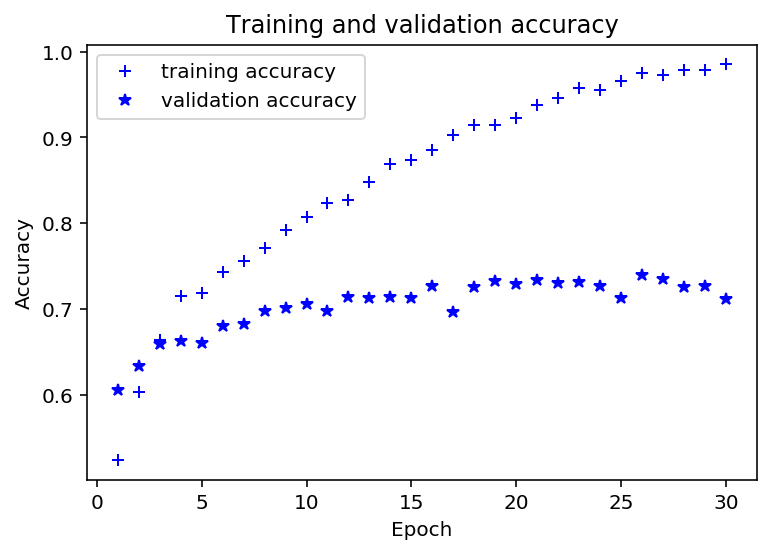

In [72]:
plt.plot(epochs, acc, 'b+', label='training accuracy')
plt.plot(epochs, val_acc, 'b*', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

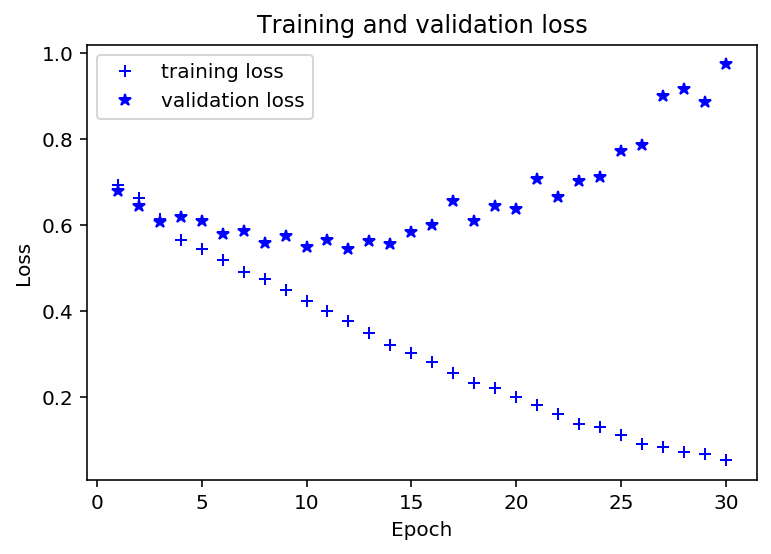

In [73]:
plt.plot(epochs, loss, 'b+', label='training loss')
plt.plot(epochs, val_loss, 'b*', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
np.argmin(val_loss)

11

In [75]:
np.argmax(val_acc)

25

In [76]:
print(val_loss[11])
print(val_loss[25])

0.542818370461464
0.784339519739151


Of note, the validation loss reaches its minimum value at epoch 11, but let's check with a smoothed version of the loss.

In [78]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [79]:
smooth_val_loss = smooth_curve(val_loss)

In [80]:
np.argmin(smooth_val_loss)

14

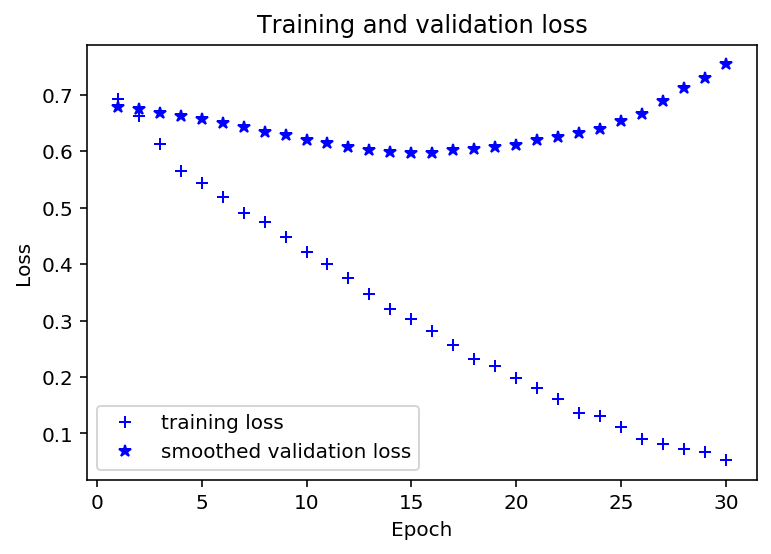

In [81]:
plt.plot(epochs, loss, 'b+', label='training loss')
plt.plot(epochs, smooth_val_loss, 'b*', label='smoothed validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data Augmentation

One way to prevent overfitting in these small training datasets is to perform data augmentation. This means performing perturbations of existing images to give the network different "looks" at the same image, effectively increasing the size of the dataset. This can be done through translation, rotation, reflection, ect.

We'll use the ImageDataGenerator instance to perform random augmentations.

In [82]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [83]:
from tensorflow.keras.preprocessing import image

In [84]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

In [85]:
img_path = fnames[3]

In [86]:
img = image.load_img(img_path, target_size=(150, 150))

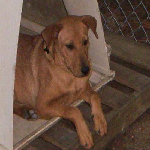

In [87]:
img

In [88]:
x = image.img_to_array(img) # converts image to a numpy array

In [89]:
x.shape?

Type:        tuple
String form: (150, 150, 3)
Length:      3
Docstring:  
Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.


We need to include the batch as a dimension:

In [90]:
x = x[np.newaxis, ...]

In [91]:
x.shape

(1, 150, 150, 3)

In [1]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    #plt.tight_layout()
    i += 1
    if i % 4 == 0:
        break

NameError: name 'datagen' is not defined